# Laptop assignment 2

## Implementation of Newton-Raphson method

The Newton-Raphson method is a method to find successively better approximations of the roots of a function $f$, given you know its derivative $f'$. Given a starting approximation $x_0$, we iteratively compute approximations $x_0, \dots, x_k$ using the following rule: If $x_i$ is the approximation of the root at the $i$-th iteration, then $x_{i+1}$ is given by

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.
$$



### TODO 1 (2.5 pt) 

Write a function `newton_method(f, f_prime, x_0, tol, max_it)` that computes a root of the function `f` using the Newton-Raphson method with starting point `x_0`, tolerance `tol` and maximum number of iterations `max_it`. The input `f_prime` is the derivative of `f`.

Note that both `f` and `f_prime` are functions passed as arguments to the function `newton_method`, which means that they can be used inside that function as regular functions, e.g. `f(x)` would apply the function `f` to the variable `x`.

The function `newton_method` should output

* $x_k$, the $k^{th}$ approximation of the root, either because $|x_k - x_{k+1}| <$ `tol` or $k =$ `max_it`

* the number $k$ of iterations that have been perfomed to reach that approximation


When implementing the method and computing

$$
x_i - \frac{f(x_i)}{f'(x_i)}.
$$

Do not forget to take into account the case where $f'(x_i) =0$. In that case, either (a) $f(x_i) =0$ and we found the root (so the method converges and the algorithm can stop) or (b) $f(x_i) \neq 0$ and the method diverges. In case (b), the approximation of the root should be set to `False` and $k$ (the number of iterations) should be set to $0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def newton_method(f, f_prime, x_0, tol, max_it):
    k = 0

    x_k = x_0

    if f_prime(x_k) == 0:
        if f(x_k) == 0:
            return x_k, 0
        else:
            return False, 0

    while k < max_it:
        f_prime_k = f_prime(x_k)

        if f_prime_k == 0: 
            if f(x_k) == 0:
                return x_k, k+1
            else:
                return False, 0

        x_k_plus_1 = x_k - f(x_k) / f_prime_k

        if abs(x_k_plus_1 - x_k) < tol:
            return x_k, k+1

        x_k = x_k_plus_1
        k += 1

    return x_k, k

    
def func_0(x):
    return x**3 + 3*x**2 

def func_0_der(x):
    return 3*x**2 + 6*x

def func_1(x):
    return x**2
    
def func_1_der(x):
    return 2 * x
    
def func_2(x):
    return x**2 + 1
    
def func_2_der(x):
    return 2*x

You can run the four cells below to check your function. In particular, they will test that the output of `newton_method(func_0, func_0_der, 1.2, 0.1, 50)` is `(0.1923747694931711, 4)` and the output of `newton_method(func_0, func_0_der, 0.4, 0.1, 10)` is `(0.10891494509584959, 3)`. If the tests fail, check these cases yourself and consider priting the approximation and the number of iteration at each step.

In [2]:
def test_func_close(func, arg_list, ret_list, index_list=[0,1]):
    for arg, ret in zip(arg_list, ret_list):
        output = func(*arg)
        for i in index_list:
            assert np.isclose(output[i], ret[i]), "Basic test failed"

In [3]:
test_func_close(newton_method, [[func_0, func_0_der, 0.4, 0.1, 10],[func_0, func_0_der, 1.2, 0.1, 50], [func_1, func_1_der, 0, 0.1, 10]], [(0.10891494509584959, 3), (0.1923747694931711, 4), (0,0)], [0]) 

print('Function seems to output the right approximation (i.e. the first component of the output is correct)')

Function seems to output the right approximation (i.e. the first component of the output is correct)


In [4]:
test_func_close(newton_method, [[func_0, func_0_der, 0.4, 0.1, 10],[func_0, func_0_der, 1.2, 0.1, 50], [func_1, func_1_der, 0, 0.1, 10]], [(0.10891494509584959, 3), (0.1923747694931711, 4), (0,0)], [1]) 

print('Function seems to output the right number of iterations (i.e. the second component of the output is correct)')

Function seems to output the right number of iterations (i.e. the second component of the output is correct)


In [5]:
test_func_close(newton_method, [[func_2, func_2_der, 0, 0.1, 10]], [(False, 0)]) 

print('Function seems to handle correclty the case when the method diverges')

Function seems to handle correclty the case when the method diverges


## Closure of Polynomial Functions

Given some list of polynomial coefficients, we would like to have a general way to obtain a polynomial function associated with that list of coefficients. The first thing we may want to try is to define a function `polynome(list_coeff, x)` which returns the image of `x` for the polynomial associated with `list_coeff`. The problem with this is that the first argument of `newton_method` should be a one-argument function `f`, meaning we cannot use our current definition of `polynome`, as it has 2 arguments, the parameter `list_coeff` and the variable `x`.

So, here we use a nice Python trick called *closures*. It is a way use functions to define functions, where the inner function (the closure) will still be able to use variable inside the scope of the outer function, meaning these outer variables are included as kind of *global variables* closed specifically in the definition of the inner function. 

Below is the trick in action. The function `pol_closure` computes the result of a polynomial for some value of $x$, but also depends on `list_coeff`, which defines what the actual polynomial is. The `list_coeff` is a list of pairs, where the first element is the coefficent and the second element is the corresponding power. So, for example the polynomial

$$3x^5 + 7x^2 + 4x + 9$$

would be encoded in the list as

    [(3, 5), (7, 2), (4, 1), (9, 0)]

The function `polynome` returns the newly defined function as a result, so you can call this function with a list of coefficients as an argument to create the `pol_closure` function that only takes `x` as an argument. Verify for yourself that the function `pol_closure` does indeed compute the value of the polynomial defined by `list_coeff`.

Here, as a simple example, we use it to create the same function $x^3 + 3x^2$ as before, but now as a closure. We define a separate list of coefficients for the derivative too and use both closures to make find the root with `newton_method` as before.


In [6]:
def polynome(list_coeff):
    def pol_closure(x):
        image = 0
        for pair in list_coeff:
            image += pair[0] * x**pair[1] 
        return image
    
    return pol_closure


func_0_list = [(1, 3), (3, 2)]
func_0_der_list = [(3, 2), (6, 1)]

func_0_closure = polynome(func_0_list)
func_0_der_closure = polynome(func_0_der_list)

newton_method(func_0_closure, func_0_der_closure, 0.4, 0.1, 10)

(0.10891494509584959, 3)

## Derivate function

Now, we just defined a separate list for the derivate, but given a list of a polynomial, it should be possible to just compute what the resulting derivative list is. In fact, that might be the algorithm you're applying yourself when trying to solve this problem. If we write it out in code once, then we can easily take the derivative of any polynomial function we write in list form.

### TODO 2 (1 pt) 

Write a function `polynomial_der` that takes a list of coefficients as its only argument and returns a new list of coefficients which corresponds to the derivative of that polynomial. E.g. when you give the function `[(1, 3), (3, 2)]` as the argument, it should return `[(3, 2), (6, 1)]`.

*Hint:* Treat separately the case when one of the terms is some constant `c`, i.e. it corresponds to a pair of the form `(c,0)`.

In [7]:
def polynomial_der(list_coeff):
    derivative_list_coefficient = []
    for coeff, exponent in list_coeff:
        if exponent != 0:  
            derivative_list_coefficient.append((coeff*exponent, exponent-1))
    return derivative_list_coefficient

In [8]:
test_func_close(newton_method, [[polynome([[2,3],[2,0]]), polynome(polynomial_der([[2,3],[2,0]])), 8, 0.1, 30], [polynome([[2,3],[5,1]]), polynome(polynomial_der([[2,3],[5,1]])), 20, 0.1, 30]], [(-1.108531031360493, 17), (0.002329036436291343, 10)])

print('Function seems to work')

Function seems to work


## Specific examples

We will now apply the functions `newton_method`, `polynome` and `polynomial_der` to approximate the roots of several polynomial functions.

### TODO 3 (0.5 pt) 

First apply the function `newton_method` with starting point $1$ to the polynomial $x^2 - x -1$. Find an approximation of the root $\frac{1}{2} (1+\sqrt 5)$, also called the golden proportion, up to $9$ significant digits. How many iterations do you need?

In [9]:
polynomial_coeffs = [(1, 2), (-1, 1), (-1, 0)]
polynomial_func = polynome(polynomial_coeffs)
polynomial_prime_coeffs = polynomial_der(polynomial_coeffs)
polynomial_prime_func = polynome(polynomial_prime_coeffs)

start_punt = 1
tolerantie = 1e-9 #9 significante getallen
maximum_iteraties = 100
approx_root, iteraties = newton_method(polynomial_func, polynomial_prime_func, start_punt, tolerantie, maximum_iteraties)

print(f"De approximate root is {approx_root} and het kostte {iteraties} iteraties.")


De approximate root is 1.618033988749989 and het kostte 6 iteraties.


### TODO 4 (0.25 pt) 

Next, apply the function `newton_method` with starting point $1.5$ to the polynomial $x^3 +x^2 -2$. Find an approximation of the root $1$ up to $10$ significant digits. 

In [10]:
polynomial_coeffs_2 = [(1, 3), (1, 2), (-2, 0)]
polynomial_func_2 = polynome(polynomial_coeffs_2)
polynomial_prime_coeffs_2 = polynomial_der(polynomial_coeffs_2)
polynomial_prime_func_2 = polynome(polynomial_prime_coeffs_2)

start_punt_2 = 1.5
tolerantie_2 = 1e-10  
maximum_iteraties_2 = 100
approx_root_2, iteraties_2 = newton_method(polynomial_func_2, polynomial_prime_func_2, start_punt_2, tolerantie_2, maximum_iteraties_2)

print(f"De approximate root is {approx_root_2} en het kostte {iteraties_2} iteraties.")


De approximate root is 1.0 en het kostte 6 iteraties.


### TODO 5 (0.25 pt) 

What happens if your starting point is $-1.5$?

In [11]:
start_punt_3 = -1.5
approx_root_3, iteraties_3 = newton_method(polynomial_func_2, polynomial_prime_func_2, start_punt_3, tolerantie_2, maximum_iteraties_2)

print(f"De approximate root is {approx_root_3} en het kostte {iteraties_3} iteraties.")

De approximate root is False en het kostte 0 iteraties.


### TODO 6 (0.25 pt) 

Finally apply the function `newton_method` with starting point $1.77$ to the polynomial $x^3-3x^2 +2$. How many iterations do you need to find an approximation of the root with 10 significant digits?

In [12]:
polynomial_coeffs_3 = [(1, 3), (-3, 2), (2, 0)]
polynomial_func_3 = polynome(polynomial_coeffs_3)
polynomial_prime_coeffs_3 = polynomial_der(polynomial_coeffs_3)
polynomial_prime_func_3 = polynome(polynomial_prime_coeffs_3)

start_punt_4 = 1.77
approx_root_4, iteraties_4 = newton_method(polynomial_func_3, polynomial_prime_func_3, start_punt_4, tolerantie_2, maximum_iteraties_2)

print(f"De approximate root is {approx_root_4} en het kostte {iteraties_4} iteraties.")


De approximate root is 0.9999999999999999 en het kostte 7 iteraties.


### TODO 7 (0.25 pt) 

What happens when the starting point is $1.78$? How many iterations do you need? 

In [13]:
start_punt_5 = 1.78
approx_root_5, iteraties_5 = newton_method(polynomial_func_3, polynomial_prime_func_3, start_punt_5, tolerantie_2, maximum_iteraties_2)

print(f"De approximate root is {approx_root_5} en het kostte {iteraties_5} iteraties.")


De approximate root is 2.732050807568877 en het kostte 16 iteraties.


## Relaxed Newton method

We will see now how we can modify the Newton method in some cases where it does not converge. Consider the function 

$$ f(x) =  3x^5 -10 x^3 + 23 x $$

Note that 
$f(x)= 0 $ for $x=0$. 
For some initial conditions, the Newton method does not work: take 

$$
N (x) = x - \frac{f(x)}{f'(x)} 
$$

and choose an initial point $x_0 =-1$. Then iterates of $N$ 
are periodic 

$$
-1 \to 1 \to -1 \to 1 \cdots
$$ 

Something similar happens for an initial point $x_0$ near $-1$.

Consider the  "relaxed Newton method" given by

$$
N_\lambda (x) = x - \lambda \frac{f(x)}{f'(x)}.
$$

Now we choose $\lambda$ random from the interval $[1-R,1+R]$ (uniform distribution) with an $R$  satisfying $\frac{1}{2}\le R <1$. 
That means, we iterate as follows ("random relaxed Newton method"):

* take an initial point $x_0$;
* choose $\lambda$ random (say $\lambda_0$);
* apply $N_{\lambda_0}$, i.e. calculate $x_1 = N_{\lambda_0} (x_0)$;
* choose again  $\lambda$ random (this gives $\lambda_1$);
* apply $N_{\lambda_1}$: $x_2 = N_{\lambda_1} (x_1)$;
* etcetera.

Iterates converge to the solution $0$. 

### TODO 8 (1 pt) 

Write code to do this.
Can you explain (non-rigorously) why this works?

You can use the function `uniform` from the `random` library to generate a random number between $(1-R)$ and $(1+R)$. The full documentation can be found [here](https://docs.python.org/3/library/random.html#random.uniform)

In [14]:
def relaxed_newton_method(f, f_prime, x_0, tol, max_it, R):
    pass

In [15]:
list_coeff_4 = [[3,5], [-10, 3], [23, 1]]
random.seed(10)
test_func_close(relaxed_newton_method, [[polynome(list_coeff_4), polynome(polynomial_der(list_coeff_4)), -1, 0.001, 1000, 0.75]], [(-0.0007000012677832279, 8)])
test_func_close(relaxed_newton_method, [[polynome(list_coeff_4), polynome(polynomial_der(list_coeff_4)), -1, 0.001, 1000, 0.75]], [(-0.0006011773865865731, 10)]) 
random.seed()

print('Function seems to work')

TypeError: 'NoneType' object is not subscriptable

## Plotting histograms for the Newton method 

We will now try to see to which extent the number of iterations depends on the starting point. We will consider a large enough sample of starting points $x$, equally distributed over some interval $I$. We will then plot an histogram where each bin corresponds to an $x$ and the height represents the number of iterations needed to converge when the starting point of the Newton method is $x$.

So we start by giving an example on how to plot a simple histogram. Full documentation can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

[5, 7, 9, 11, 13]


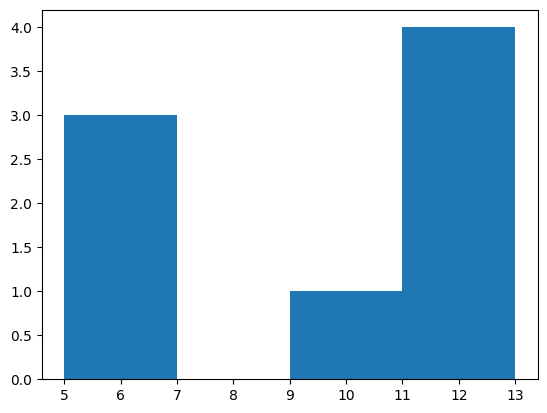

In [ ]:
list_hist = [6, 6.5, 6.8, 10, 11, 12, 12, 12]
sequence_bins = [2 * i + 1 for i in range(2, 7)]
print(sequence_bins)

plt.hist(list_hist, sequence_bins)
plt.show()

In the example, `sequence_bins` is equal to the set $\{ 5, 7, 9, 11, 13 \}$. When passed as a second argument in the `hist` function from the `numpy` library, this ensures that the following bins will be created

$$
[5, 7), [7, 9), [9, 11), [11, 13)
$$

where $[5, 7)$ means that this is a half-open interval, where $5$ is included in the bin, and $7$ is not.

Once the bins are created, we can see in `list_hist` that there are $3$ values that belong to the interval $[5,7)$ (namely $6, 6.5$ and $6.8$) and the height of the histogram for that bin is $3$.

### TODO 9 (2.5 pt) 

Write a function `hist_number_it(f, f_prime, n, int_min, int_max, tol, max_it)` where `f` is a function, `f'` is its derivative, `tol` is the tolerance and `max_it` is the maximum number of iterations of the Newton method (so this is all the same as in the very first function of this assignment). 

Then `hist_number_it` should plot an histogram over the interval `[int_min, int_max]` with `n` bins of equal size. The height of the column of the $i^{th} $ bin should be the number of iterations needed to converge, as outputed by `newton_method` when the starting point `s_i` is

    s_i = int_min + i * (int_max - int_min) / n

So basically we take a sample of `n` points over the interval `[int_min, int_max]` and each of these points corresponds to a bin of the histogram. The height of the bin corresponds to the number of iterations of the Newton method.

The function should also plot the graph of the function `f` over the interval `[int_min, int_max]`. So the final result should be a plot of the graph of the original function, with a histogram overlayed, showing the number of iterations at each point. What points do you expect will need more steps to converge and what points will need less steps?

### Some hints for the function

If you want to make $n$ bins, with $n$ different starting points, then your `sequence_bins` should define $n+1$ bounds, resulting in $n$ intervals. Create your list of $n$ starting points `s_i` first, and then create the list containing $n+1$ bounds, remembering that the first bound of the half-open interval *is* included in the interval itself.

Also, in order to make single bar in a histogram of height $h$, located at $[x, x+d)$, the easiest way would be to just include $h$ copies of the value of $x$ in the list of values used to make the histogram. That way, you are certain there are exactly $h$ values that fall within the interval $[x, x+d)$.

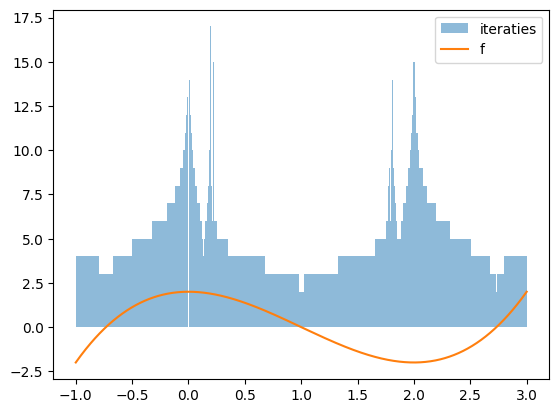

In [ ]:
def hist_number_it(f, f_prime, n, int_min, int_max, tol, max_it):
    start_points = [int_min + i * (int_max - int_min) / n for i in range(n)]
    
    iterations = [newton_method(f, f_prime, s, tol, max_it)[1] for s in start_points]
    
    sequence_bins = [int_min + i * (int_max - int_min) / n for i in range(n+1)]
    
    hist_values = [start_points[i] for i in range(n) for _ in range(iterations[i])]
    
    plt.hist(hist_values, sequence_bins, alpha=0.5, label='iteraties')
    
    x = np.linspace(int_min, int_max, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y, label='f')
    
    plt.legend()
    plt.show()

list_coeff_3 = [[1,3], [-3,2], [2,0]] 
hist_number_it(polynome(list_coeff_3), polynome(polynomial_der(list_coeff_3)), 2000, -1, 3, 0.00001, 200)

## Plotting histograms while differentiating each root

We will now do the same thing but for a different function `func_1` (defined below) with $3$ roots. In addition, instead of 1 histogram, we will plot 3 histograms, each of them of a different color and each corresponding to one of the $3$ roots. 

If a starting point $x$ is associated with a a bin of height $h$, the color of the bin indicates to which root the Newton method would converge (if the starting point is $x$) and the height indicates as before the number of iterations. So basically, we have to do the same thing as in the previous exercises except that we have to make $3$ lists instead of one (because we need to plot $3$ histograms). 

We want to put in the same list the points $x$ that converge to the same root. 

### TODO 10 (1 pt) 

To help you achieve that, we ask you to first write a function `same_root(f, f_prime, x1, x2, epsilon, tol, max_it)` that returns `True` if `x_1` and `x_2` converge to the same root. More precisely, if the approximations of the roots with starting points `x_1` and `x_2` differ of at most `epsilon`.

### TODO 11 (2 pt) 

Then using that function, write a function `plot_hist_newton(f, f_prime, n, int_min, int_max, epsilon, tol, max_it)` that when the input is the function `f = func_1` and `f_prime = func_1_der` (`func_1` and `func_1_der` both defined in the code below), plot the graph of the function `f` over the interval `[int_min, int_max]` and $3$ histograms, each of them corresponding to one of the $3$ roots. As before, `tol` is the tolerance and `max_it` is the maximum number of iterations. `epsilon` is one of the inputs of the function `same_root` that you should use to write your function `plot_hist_newton`.

The 3 histograms corresponding to each root $r$ all have `n` bins (like in the previous exercise) and each bin number $i$ corresponds to the starting point

    s_i = int_min + i * (int_max - int_min) / n

In each of these histograms, only the starting points that converge to the root $r$ of that histogram, have their number of iterations counted in that bin. All other bins have no values counted in them, i.e. a height of $0$. The height of the non-empty bins should correspond to the number of iterations of the Newton method with starting point $x$, as before. Plotting these 3 histograms in the same plot should overlay them and make each of the different colors show up "side by side", as the other bins contain no values.

*Hint:* When you compute a root for some starting point $x$, consider if it should be included in one of the existing histogram lists, or if this is a *new* root you have not seen before, meaning you have to use a new empty list to store the number of iterations. Use your function `same_root` to distinguish these cases carefully and write code to handle them separately. 

To make your code as general as possible, do not use the values of the roots in your function.

In [ ]:
def func_1(x):
    return (x-2)*x*(x+2)

def func_1_der(x):
    return x*(x+2) + (x-2)*(x+2) + (x-2)*x

def same_root(f, f_prime, x1, x2, epsilon, tol, max_it):
    root1, _ = newton_method(f, f_prime, x1, tol, max_it)
    root2, _ = newton_method(f, f_prime, x2, tol, max_it)

    return abs(root1 - root2) <= epsilon


In [ ]:
assert same_root(func_0_closure, func_0_der_closure, 0.4, 50, 0.1, 0.1, 10) is False, 'Basic test failed'
assert same_root(func_0_closure, func_0_der_closure, 0.4, 1, 0.1, 0.1, 10) is True, 'Basic test failed'
assert same_root(func_0_closure, func_0_der_closure, 10, 40, 0.1, 0.1, 10) is False, 'Basic test failed'
assert same_root(func_0_closure, func_0_der_closure, 0.4, -1, 0.1, 0.1, 10) is False, 'Basic test failed'

print("Function seems to work")

Function seems to work


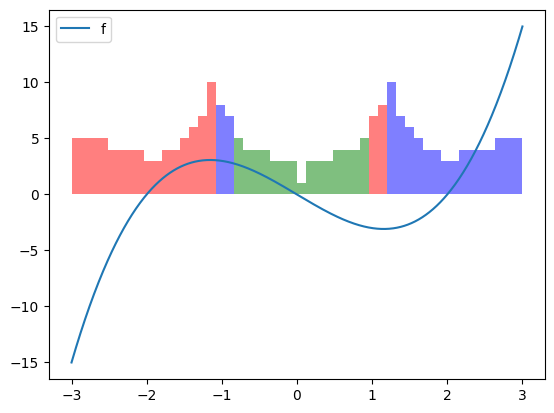

In [ ]:
def plot_hist_newton(f, f_prime, n, int_min, int_max, epsilon, tol, max_it):
    start_points = [int_min + i * (int_max - int_min) / n for i in range(n)]
    
    roots = []
    iters_per_root = []
    start_points_per_root = []
    
    for s in start_points:
        root, iters = newton_method(f, f_prime, s, tol, max_it)
        
        found = False
        for i, known_root in enumerate(roots):
            if same_root(f, f_prime, root, known_root, epsilon, tol, max_it):
                iters_per_root[i].append(iters)
                start_points_per_root[i].append(s)
                found = True
                break
        
        if not found:
            roots.append(root)
            iters_per_root.append([iters])
            start_points_per_root.append([s])
    
    colors = ['red', 'blue', 'green']
    sequence_bins = [int_min + i * (int_max - int_min) / n for i in range(n+1)]
    
    for i, iters in enumerate(iters_per_root):
        hist_values = [start_points_per_root[i][j] for j in range(len(iters)) for _ in range(iters[j])]
        plt.hist(hist_values, sequence_bins, alpha=0.5, color=colors[i])
    
    x = np.linspace(int_min, int_max, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y, label='f')
    
    plt.legend()
    plt.show()


plot_hist_newton(func_1, func_1_der, 50, -3, 3, 0.1, 0.0001, 1000)
        
        

## Newton method in 2 dimensions

We will now implement the Newton method in the case of a function with $2$ variables. Let $f$ be function from $\mathbb{R}^2$ to $\mathbb{R}^2$ defined by

$$
f(x,y) = (f_x(x,y), f_y(x,y))
$$

where $f_x(x,y) = x^3 - 3xy^2 - x^2 + y^2 + x-1$ and $f_y(x,y) = 3x^2y - y^3 -2xy +y$. 

Its roots are the points $(x,y)$ such that $f(x,y) = (0,0)$. To find approximations of the roots, we can generalize the Newton method that we used previously. Our starting point is any point $(x_0, y_0)$ and we iteratively compute approximations $(x_0, y_0), \dots, (x_k,y_k)$ of the roots using the following rule: If $x(_i,y_i)$ is the approximation of the root at the $i$-th iteration, then $(x_{i+1}, y_{i+1})$ is given by

$$
(x_{i+1}, y_{i+1}) = (x_i,y_i) - [Df(x_i,y_i)]^{-1} f(x_i, y_i).
$$

where $Df(x_i,y_i)$ is the Jacobian matrix evaluated at the point $(x_i, y_i)$. For a function from $\mathbb{R}^2$ to $\mathbb{R}^2$, the Jacobian matrix $Df(x,y)$  is given by

$$
\begin{bmatrix}
\frac{\partial f_x (x,y)}{\partial x} & \frac{\partial f_x(x,y)}{\partial y}\\
\frac{\partial f_y(x,y)}{\partial x} & \frac{\partial f_y(x,y)}{\partial y}\\
\end{bmatrix}
$$

In our specific case, $f$ has $3$ roots: $(1,0)$, $(0,1)$ and $(0,-1)$. Given a starting point $(x,y)$, the Newton method may converge to one of those $3$ roots. We will color the 2D plane with 3 different colors in such a way that if $2$ points converge to the same root, they have the same color and if $2$ points converge to different roots, they are assigned different colors.

This means that the resulting image will have pixels, each corresponding to an $(x,y)$ coordinate in the the plane, and the color of that pixel will depend on the root to which $(x,y)$ converges. Note that this is very similar to what you just did for the histograms (colors also indicated the different roots), but now it is plotted in 2 dimensions as an image. The code to compare the different returned roots and to color the image has already been provided.

You still have to write $3$ functions to create the image

### TODO 12 (3 pts)

* (1 pt) the function `func_2d` which takes as an input a vector $[x,y]^T$ and returns the vector $[f_x(x,y), f_y(x,y)]^T$


* (1 pt) the function `func_2d_der` which takes as an input a vector $[x,y]^T$ and returns the matrix $Df(x,y)$


* (1 pt) the function `method_newton_2d(f, f_der, x_0, y_0, tol, max_it)` which returns the approximation of the root using the Newton method and starting point $($ `x_0`, `y_0` $)$. Here, `f` is a function which maps a vector of dimension $2$ to a vector of dimension $2$. `f_der` is the jacobian matrix of `f`. As usual, `tol` is the tolerance and `max_it` is the maximum number of iteration (so we stop at $(x_k,y_k)$ either because $k>$ `max_it` or the distance between $(x_k,y_k)$ and $(x_{k+1},y_{k+1})$ is $<$ `tol`). Hint. To find the distance between 2 vectors, you can use the function `np.linalg.norm` (full documentation [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). 

So these $3$ functions output a vector of dimension $2$ or a matrix. How do we represent a matrix in numpy? For example, the matrix 

$$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6 
\end{bmatrix}
$$

can be represented by the numpy array

`np.array([[1,2,3], [4,5,6]])`

and the vector $[x,y]^T$ can be represented by the numpy array

`vec = np.array([[x],[y]])`

Once matrices and vectors are represented as numpy arrays, the advantage is that there are many built-in functions from the `numpy` library to can be used to manipulate those arrays. Here, you may find useful the function `np.linalg.inv` which computes the inverse of a matrix and the function `np.dot` which computes the product of $2$ matrices. 

Pay attention to the fact that the outputs of your functions should be also numpy arrays (and not lists). 

In [ ]:
def func_2d(vec):
    x, y = vec[0,0], vec[1,0]
    fx = x**3 - 3*x*y**2 - x**2 + y**2 + x - 1
    fy = 3*x**2*y - y**3 - 2*x*y + y
    return np.array([[fx],[fy]])

In [ ]:
assert np.allclose(func_2d(np.array([[2], [3]])), np.array([[-40],[0]])), 'Basic test failed'
assert np.allclose(func_2d(np.array([[5], [2]])), np.array([[48],[124]])), 'Basic test failed'

print("Function seems to work")

Function seems to work


In [ ]:
def func_2d_der(vec):
    x, y = vec[0,0], vec[1,0]
    dfx_dx = 3*x**2 - 3*y**2 - 2*x + 1
    dfx_dy = -6*x*y + 2*y
    dfy_dx = 6*x*y - 2*y
    dfy_dy = 3*x**2 - 3*y**2 -2*x+1
    return np.array([[dfx_dx, dfx_dy],[dfy_dx, dfy_dy]])

In [ ]:
assert np.allclose(func_2d_der(np.array([[2], [3]])), np.array([[-18,-30],[30,-18]])), 'Basic test failed'
assert np.allclose(func_2d_der(np.array([[5], [2]])), np.array([[54, -56],[56,54]])), 'Basic test failed'

print("Function seems to work")

Function seems to work


In [ ]:
def newton_method_2d(f, f_der, x_0, y_0, tol, max_it):
    vec = np.array([[x_0],[y_0]])
    for _ in range(max_it):
        vec_new = vec - np.dot(np.linalg.inv(f_der(vec)), f(vec))
        if np.linalg.norm(vec_new - vec) < tol:
            break
        vec = vec_new
    return vec

In [ ]:
assert np.allclose(newton_method_2d(func_2d, func_2d_der, 2, 3, 0.1, 20), np.array([[0.03571238],[1.00455638]])), 'Basic test failed'
assert np.allclose(newton_method_2d(func_2d, func_2d_der, 4, 6, 0.1, 20), np.array([[0.98553187],[-0.03361085]])), 'Basic test failed'

print("Function seems to work")

Function seems to work


In [ ]:
def plot_image(f, f_der, tol, max_it, sol_1, sol_2, sol_3, min_x, max_x, min_y, max_y, resol):
    X = np.linspace(min_x, max_x, resol)
    Y = np.linspace(min_y, max_y, resol)
    
    image = np.zeros((resol, resol, 3))
    sol_mat = np.hstack([np.array(sol_1), np.array(sol_2), np.array(sol_3)])
    
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            approx = newton_method_2d(f, f_der, x, y, tol, max_it)
            norms = np.linalg.norm(sol_mat - approx, axis=0)
            image[i][j][np.argmin(norms)] = 1
        
    plt.imshow(image)

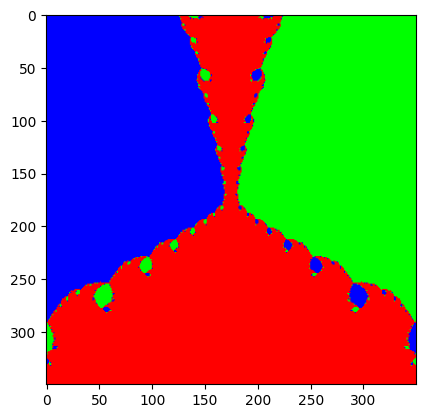

In [ ]:
sol_1 = np.array([[1],[0]])
sol_2 = np.array([[0],[1]])
sol_3 = np.array([[0],[-1]])
# Once your program is correct, you can increase the resolution
# (this will increase the running time)
resolution = 350

plot_image(func_2d, func_2d_der, 0.1, 20,  sol_1, sol_2, sol_3, -10, 10, -10, 10, resolution)

## Application: finding the angle for a projectile (bonus 0.5 pt)


A projectile is shot with a speed $v$ and an angle $\theta$. The height of the projectile at a distance $x$ from the origin is given by the function 
$$
f(x, \theta) = \tan \theta x - \frac{1}{2} g \left( \frac{x}{v \cos \theta} \right)^2
$$
where $g=9.8 m/s^2$

We would like to know at which angle we need to shoot so that the projectile hit the ground at a fixed distance $R$. This means that we have to find the right angle $\theta$ such that $f(R,\theta) =0$ (the height of the projectile at distance $R$ should be $0$). 

Since $x$ is now some fixed distance $R$, we have a function $h$ with only one variable.

$$
h(\theta) = \tan (\theta) R - \frac{1}{2} g \left( \frac{R}{v \cos (\theta)} \right)^2
$$

Our goal is then to determine $\theta$ such that $h(\theta) =0$. 

Given $R=10 m$ and $v = 13 m/s$, use your function `newton_method` to find the right angle such that projectile hit the ground after exactly $10 m$.

In [ ]:
R = 10
v = 13
g = 9.8

def h(theta):
    return math.tan(theta) * R - 0.5 * g * (R / (v * math.cos(theta)))**2

def h_der(theta):
    return R / math.cos(theta)**2 + g * R**2 / v**2 * math.sin(theta) / math.cos(theta)

theta_0 = math.pi / 4  # 45 graden

theta, _ = newton_method(h, h_der, theta_0, tol=1e-6, max_it=100)


theta_degrees = math.degrees(theta) # naar graden omzetten

print(f"De correcte hoek is {theta_degrees} graden.")



De correcte hoek is 17.721144927198875 graden.
